In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import CubicSpline
from scipy.misc import derivative
from scipy import integrate

import warnings
warnings.filterwarnings('ignore')

# Parâmetros para plot
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams["font.family"] = "serif"
plt.rcParams['axes.grid'] = False

In [ ]:
H = np.array([0,68,135,203,271, 338,406,474,542,609,1100,1500,2500,4000,5000,9000,12000,20000,25000])
B = np.array([0, 0.733,1.205, 1.424, 1.517, 1.560,1.588,1.617,1.631,1.646,1.689,1.703,1.724,1.731,1.738,1.761,1.770,1.80,1.816])

In [2]:
# Parâmetros
g         = 2*0.45*10**-3 # mm
RaioRotor = 6.3*10**-2  # cm
D         = 8*10**-2    # cm
N         = 90
lf        = 20e-2   # cm
u0        = 4*np.pi*10**-7
NumPontos = 100

In [3]:
H = np.array([0,68,135,203,271, 338,406,474,542,609,1100,1500,2500,4000,5000,9000,12000,20000,25000])
B = np.array([0, 0.733,1.205, 1.424, 1.517, 1.560,1.588,1.617,1.631,1.646,1.689,1.703,1.724,1.731,1.738,1.761,1.770,1.80,1.816])

ITEM 1)
Apresente um gráfico do fluxo concatenado na bobina 1 em função da corrente
aplicada nessa bobina considerando a posição do rotor variando da posição -30°
até +30° graus.

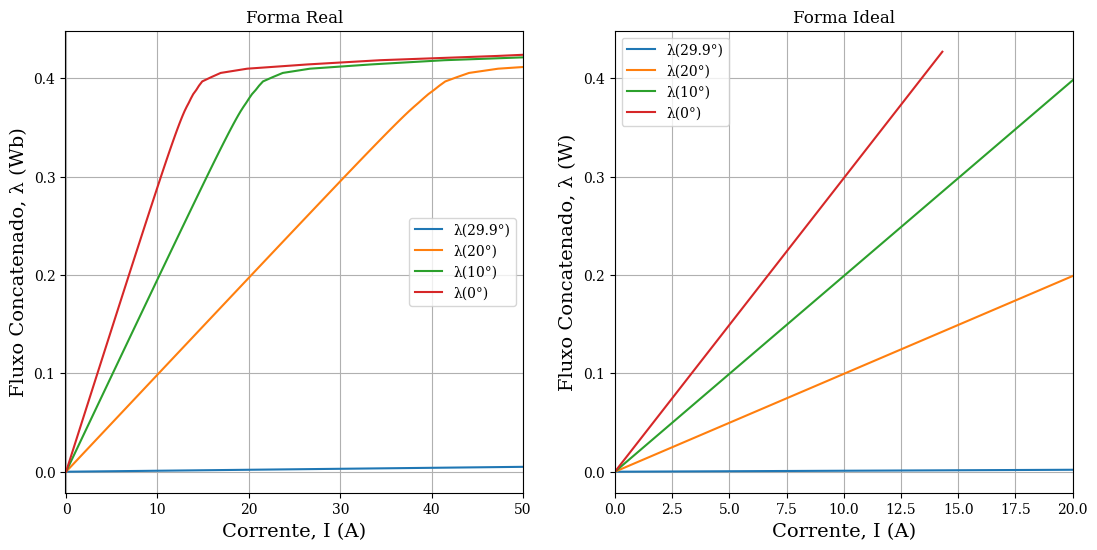

In [4]:
plt.rcParams['figure.figsize'] = 13, 6

# Interpolação para tirar função de H
H_real       = CubicSpline(B, H, bc_type='natural')
# Area que haverá fluxo entre o rotor e estator de acordo com o ângulo
AngIntervalo = [-29.9, -20, -10, 0, 10, 20, 29.9]
A            = lambda theta:(30-abs(theta))*np.pi*RaioRotor*D/180  # Área do entreferro
Am           = (np.pi/6)*RaioRotor*D                               # Área do ferro

I_real       = np.zeros(NumPontos)
I_ideal      = np.zeros(NumPontos)
fluxo_conc   = np.zeros(NumPontos)
Bar          = np.zeros(NumPontos)
Bm           = np.zeros(NumPontos)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i, color in zip(AngIntervalo, colors):
  k = Am/A(i)
  for j in range(len(Bm)):
    Bm[j]         = (1.816/NumPontos)*j # Na simulação, vamos tomar o B de 0 a 1.816. Isso permite que o x seja estritamente crescente
    Bar[j]        = Bm[j]*k
    fluxo_conc[j] = N*Am*Bm[j]
    I_real[j]     = (H_real(Bm[j])*lf + Bar[j]*g/u0)/N
    I_ideal[j]    = ((Bar[j]/u0)*g)/N

  plt.subplot(1,2,1)
  plt.plot(I_real, fluxo_conc, color = color)
  plt.xlim([-0.1,50])
  plt.legend(["λ(29.9°)", "λ(20°)", "λ(10°)", "λ(0°)"], loc = "best", prop={'size':10})
  plt.xlabel('Corrente, I (A)')
  plt.ylabel('Fluxo Concatenado, λ (Wb)')
  plt.title('Forma Real')
  plt.grid(True)
  plt.subplot(1,2,2)
  plt.plot(I_ideal, fluxo_conc, color = color)
  plt.xlim([-0.01,20])
  plt.legend(["λ(29.9°)", "λ(20°)", "λ(10°)", "λ(0°)"], loc = "best", prop={'size':10})
  plt.grid(True)
  plt.xlabel('Corrente, I (A)')
  plt.ylabel('Fluxo Concatenado, λ (W)')
  plt.title('Forma Ideal')

ITEM 2) Determine qual deve ser a corrente aplicada na bobina de modo a obter uma
densidade de fluxo de 1,8 T quando o rotor estiver na posição zero graus.

In [6]:
I_max= (H_real(1.8)*lf + (1.8*k/u0)*(g/2))/N
I_max
b = H_real(1.8)*lf
c = (1.8*k/u0)*(g/2)
print(b)
print(c)
a = b + c
a = a/90
a

4000.0
644.5775195221761


51.60641688357973

ITEM 3) Apresente um gráfico do Torque produzido pela bobina 1 em função
da posição do rotor considerando que o núcleo seja ideal;

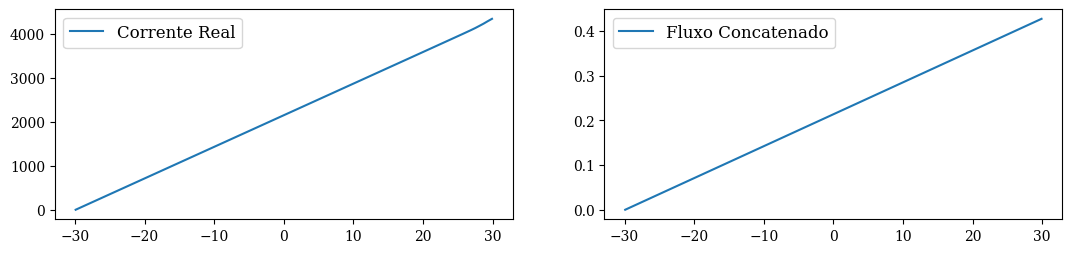

In [149]:
theta        = np.linspace(np.min(AngIntervalo), np.max(AngIntervalo), NumPontos)

W_real       = []
W_ideal      = []
I_real       = np.zeros(NumPontos)
I_ideal      = np.zeros(NumPontos)
fluxo_conc   = np.zeros(NumPontos)
Bar          = np.zeros(NumPontos)


for t in theta:
  for j in range(0,NumPontos):
    Bm[j]               = (1.816/NumPontos)*j # Permite que o x seja estritamente crescente
    Bar[j]              = Bm[j]*(Am/A(t))
    fluxo_conc[j]       = N*Am*Bm[j]
    I_real[j]           = (H_real(Bm[j])*lf + (Bar[j]/u0)*g)/N
    I_ideal[j]          = ((Bar[j]/u0)*g)/N

  # Interpolação dos Fluxos Concatenados
  Fluxo_x_I_real  = CubicSpline(I_real, fluxo_conc, bc_type='natural')
  Fluxo_x_I_ideal = CubicSpline(I_ideal, fluxo_conc, bc_type='natural')

  # Vetor de corrente para a integração
  Iint = np.linspace(0,I_max,NumPontos)

  # Definindo o vetor fluxo concatenado
  λ_real  = Fluxo_x_I_real(Iint)
  λ_ideal = Fluxo_x_I_ideal(Iint)

  # Definindo o vetor energia integrando o fluxo
  W_real.append(sp.integrate.trapezoid(Iint, λ_real))
  W_ideal.append(sp.integrate.trapezoid(Iint, λ_ideal))
  # print(f'Energia real: {sp.integrate.trapezoid(Iint, λ_real)}, Energia ideal: {sp.integrate.trapezoid(Iint, λ_ideal)}')


W_real = np.array(W_real)
W_ideal = np.array(W_ideal)

# Determinando a curva através Interpolação
Inter_W_real = CubicSpline(theta, W_real, bc_type = "natural")
Inter_W_ideal = CubicSpline(theta, W_ideal, bc_type = "natural")

# Achando o Torque a partir da derivada da energia
Torque_real = derivative(Inter_W_real, theta, dx=np.max(theta)/NumPontos)
Torque_ideal = derivative(Inter_W_ideal, theta,dx=np.max(theta)/NumPontos)


plt.subplot(2,2,1)
plt.plot(theta, I_real)
plt.legend(["Corrente Real"])
plt.subplot(2,2,2)
# plt.plot(theta, I_ideal)
# plt.legend(["Corrente Ideal"])
# plt.subplot(2,2,3)
plt.plot(theta, fluxo_conc)
plt.legend(["Fluxo Concatenado"])

In [150]:
# for i in range(len(I_real)):
#   print(f'I_real: {I_real[i]}, I_ideal: {I_ideal[i]}, Hm: {H_real(Bm[i])}')

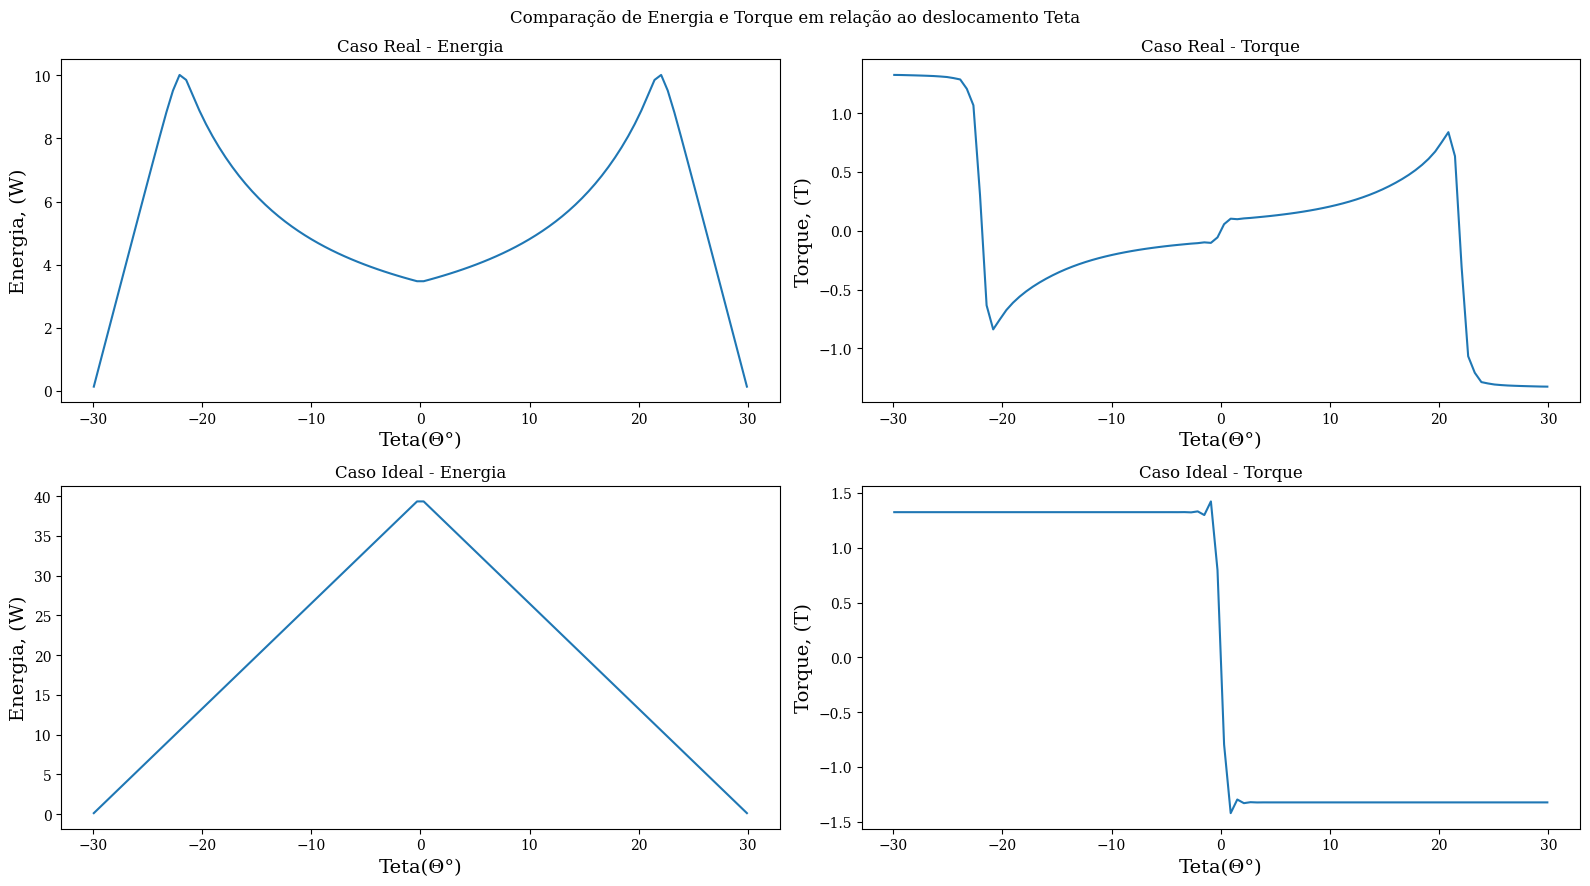

In [151]:
plt.figure(figsize=(16, 9))

plt.subplot(2, 2, 1)
plt.plot(theta, W_real)
plt.title("Energia vs Deslocamento")
plt.ylabel("Energia, (W)")
plt.xlabel("Teta(Θ°)")

plt.subplot(2, 2, 2)
plt.plot(theta, Torque_real)
plt.title("Torque vs Deslocamento")
plt.xlabel("Teta(Θ°)")
plt.ylabel("Torque, (T)")

plt.subplot(2, 2, 3)
plt.plot(theta, W_ideal)
plt.ylabel("Energia, (W)")
plt.xlabel("Teta(Θ°)")

plt.subplot(2, 2, 4)
plt.plot(theta, Torque_ideal)
plt.xlabel("Teta(Θ°)")
plt.ylabel("Torque, (T)")

# Título para a figura como um todo
plt.suptitle("Comparação de Energia e Torque em relação ao deslocamento Teta")

# Títulos dos subsplots
plt.subplot(2, 2, 1).set_title("Caso Real - Energia")
plt.subplot(2, 2, 2).set_title("Caso Real - Torque")
plt.subplot(2, 2, 3).set_title("Caso Ideal - Energia")
plt.subplot(2, 2, 4).set_title("Caso Ideal - Torque")

plt.tight_layout()

ITEM 5) Deseja-se que o sistema opere com uma velocidade constante de 100 RPM em
sentido anti-horário. Descreva como deverá ser a programação do sistema que
controla a injeção de corrente nas bobinas.

In [160]:
print("Intervalos de angulos para rotacionar o rotor no sentido anti-horário:")
fase = 1
for i in range(12):
  print("No intervalo de ângulo de " + str(i*30) + "° até " + str(i*30 + 30) + "° será aplicada uma corrente na bobina da fase: " + str(fase))
  if(fase < 3):
    fase+=1
  else:
    fase=1


vps = 100/60 #voltas por segundo.
t = 1/vps #o tempo necessário pra dar uma volta.
ta = t/12 #o tempo de acionamento de cada fase, ta, é o tempo de uma volta dividido pelos estados possíveis de acionamento de cada fase.
print("Dessa forma, o acionamento da corrente de cada fase especifica é de: " + str(round(ta*1000)) + " ms")

Intervalos de angulos para rotacionar o rotor no sentido anti-horário:
No intervalo de ângulo de 0° até 30° será aplicada uma corrente na bobina da fase: 1
No intervalo de ângulo de 30° até 60° será aplicada uma corrente na bobina da fase: 2
No intervalo de ângulo de 60° até 90° será aplicada uma corrente na bobina da fase: 3
No intervalo de ângulo de 90° até 120° será aplicada uma corrente na bobina da fase: 1
No intervalo de ângulo de 120° até 150° será aplicada uma corrente na bobina da fase: 2
No intervalo de ângulo de 150° até 180° será aplicada uma corrente na bobina da fase: 3
No intervalo de ângulo de 180° até 210° será aplicada uma corrente na bobina da fase: 1
No intervalo de ângulo de 210° até 240° será aplicada uma corrente na bobina da fase: 2
No intervalo de ângulo de 240° até 270° será aplicada uma corrente na bobina da fase: 3
No intervalo de ângulo de 270° até 300° será aplicada uma corrente na bobina da fase: 1
No intervalo de ângulo de 300° até 330° será aplicada uma

Observação : Considere que exista um sensor de posição, de modo que a posição
do rotor é sempre conhecida pelo sistema que controla a corrente dos
enrolamentos;

Observação 2: Considere que a velocidade de 100 RPM é suficientemente lenta de
modo que o tempo necessário para a corrente sair de 0 até seu valor máximo pode
ser desprezado.


ITEM 6) Considerando o núcleo como sendo ideal, determine a razão
entre a potência mecânica desenvolvida pelo motor e a potência necessária para
o sistema de acionamento.

In [153]:
I_real

array([   0.        ,   43.35725983,   86.71452074,  130.07178378,
        173.42905004,  216.78632058,  260.14359647,  303.50087878,
        346.85816858,  390.21546694,  433.57277493,  476.93009363,
        520.2874241 ,  563.64476741,  607.00212464,  650.35949685,
        693.71688511,  737.0742905 ,  780.43171408,  823.78915692,
        867.1466201 ,  910.50410468,  953.86161174,  997.21914234,
       1040.57669756, 1083.93427846, 1127.29188612, 1170.64952161,
       1214.00718599, 1257.36488034, 1300.72260572, 1344.08036321,
       1387.43815388, 1430.7959788 , 1474.15383903, 1517.51173565,
       1560.86966973, 1604.22764234, 1647.58565455, 1690.94370742,
       1734.30180203, 1777.65993973, 1821.01812544, 1864.37636659,
       1907.73467065, 1951.09304511, 1994.45149745, 2037.81003514,
       2081.16866567, 2124.52739651, 2167.88623514, 2211.24518904,
       2254.6042657 , 2297.96347258, 2341.32281717, 2384.68230695,
       2428.0419494 , 2471.40175199, 2514.76172221, 2558.12186

(0.4269949187865384, 14.451268832744098, 70.00682438829966)

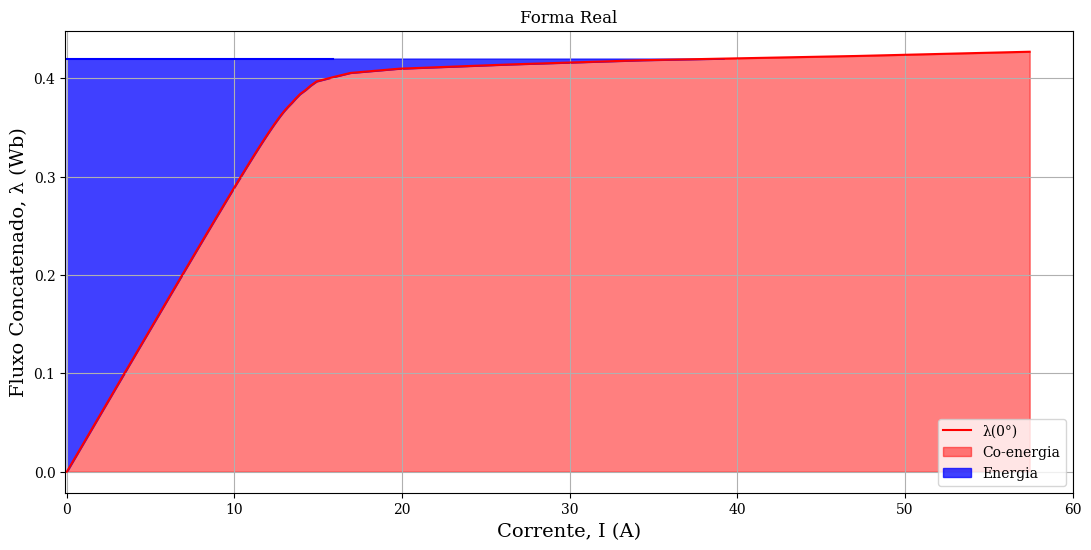

In [154]:
cte = []
k = Am/A(0)
for j in range(len(Bm)):
  Bm[j]         = (1.816/NumPontos)*j # Na simulação, vamos tomar o B de 0 a 1.816. Isso permite que o x seja estritamente crescente
  Bar[j]        = Bm[j]*k
  fluxo_conc[j] = N*Am*Bm[j]
  I_real[j]     = (H_real(Bm[j])*lf + Bar[j]*g/u0)/N
  I_ideal[j]    = ((Bar[j]/u0)*g)/N

  cte.append(0.42)

plt.plot(I_real, fluxo_conc, color = 'red', label = "λ(0°)")
plt.plot(I_real[:94], cte[:94], color = 'blue')
plt.fill_between(I_real, fluxo_conc, alpha=0.5, color = 'red', label = 'Co-energia' )
plt.fill_between(I_real, fluxo_conc, cte, where=(cte > fluxo_conc), interpolate=True, color='blue', alpha=0.75, label = 'Energia')
plt.xlim([-0.1,60])
plt.legend( loc = "best", prop={'size':10})
plt.xlabel('Corrente, I (A)')
plt.ylabel('Fluxo Concatenado, λ (Wb)')
plt.title('Forma Real')
plt.grid(True)


I_maxim = (H_real(1.816)*lf + (1.816*k/u0)*g)/N
I_maxi = ((1.816*k/u0)*g)/N
fluxmax = np.max(fluxo_conc)
Pot_acionamento1 = 0.4 * I_maxim
Pot_acionamento2 = (fluxmax * I_maxi)

# Interpolação dos Fluxos Concatenados
Inter_I_fluxo  = CubicSpline(I_real, fluxo_conc, bc_type='natural')
# Vetor de corrente para a integração
Iint           = np.linspace(0,I_max,NumPontos)
# Definindo o vetor fluxo concatenado
λ              = Inter_I_fluxo(Iint)
Area_curva     = sp.integrate.trapezoid(Iint,λ) # Energia



Pot_ideal   = (fluxmax * I_maxi)/2

Razao_ideal = Pot_ideal/Pot_acionamento2
Razao_real  = 1-Area_curva/Pot_acionamento1

(fluxmax,I_maxi,I_maxim)

In [155]:
Razao_ideal

0.5

In [156]:
Razao_real

0.8768967208413049